In [ ]:
!wget https://gist.githubusercontent.com/Yegorov/dc61c42aa4e89e139cd8248f59af6b3e/raw/20ac954e202fe6a038c2b4bb476703c02fe0df87/ya.py
!chmod +x ya.py
!./ya.py https://disk.yandex.ru/d/5mI0kbSLSBD01w path/to/directory
!pip install sweetviz
!pip install gradio

--2023-05-17 06:50:02--  https://gist.githubusercontent.com/Yegorov/dc61c42aa4e89e139cd8248f59af6b3e/raw/20ac954e202fe6a038c2b4bb476703c02fe0df87/ya.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 723 [text/plain]
Saving to: ‘ya.py.1’

ya.py.1             100%[===================>]     723  --.-KB/s    in 0s      

2023-05-17 06:50:02 (54.5 MB/s) - ‘ya.py.1’ saved [723/723]

--2023-05-17 06:50:03--  https://downloader.disk.yandex.ru/disk/a74c3c5d8be9e257fca6eb5737143ac412e71864d09f5be69607e7d735f8d946/6464b15b/3v-krRA316KhQDn3zNPZX4HwlF4GN3JWIreVvZxgwp5qDAS3vC3MQK5zb8U0e3jnFqu1d7h7QYc-A-Qe92CoeA%3D%3D?uid=0&filename=bodyPerformance-dataset.csv&disposition=attachment&hash=hvFexZEHC6eeKFCtkKHvUUckNBy15/z6BX6on7TNH6yQSNKp/cz%2B/HTbJS%2BVLI/bq/J6bpmRyOJon

In [ ]:
import sweetviz as sv
import pandas as pd
import numpy as np
from sklearn import preprocessing as pre

In [ ]:
#Считываем и обрабатываем данные
df = pd.read_csv("/content/bodyPerformance-dataset.csv", sep=';')
df = df.dropna()
df = df.drop_duplicates()
df = df[df.gender != '-']#Избавимся от всех строк с пропущенными полами (предугадать их на основе роста и веса невозможно)
df = df.interpolate(method='linear')#Заполним строки линейным методом

In [ ]:
df['gender'] = df['gender'].replace(['M', 'F'], [0, 1])
df['class'] = df['class'].replace(['A', 'B', 'C', 'D'], [0, 1, 2, 3])#Преобразуем буквы в цифры

In [ ]:
df.isnull().values.any()#Нет незаполненных строк

False

In [ ]:
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1
5,36.0,1,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,2
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,3
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,0
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,3


/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  st


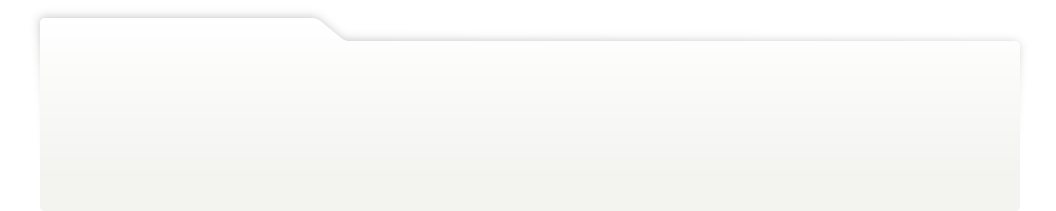
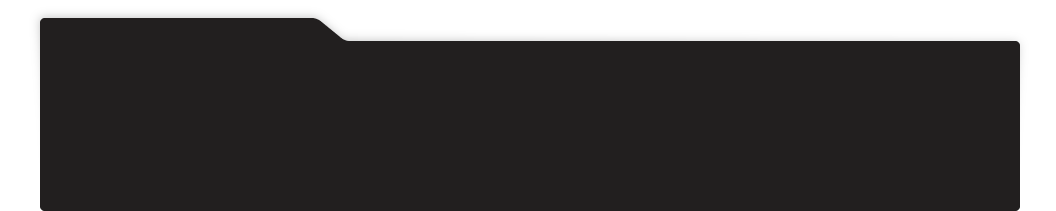
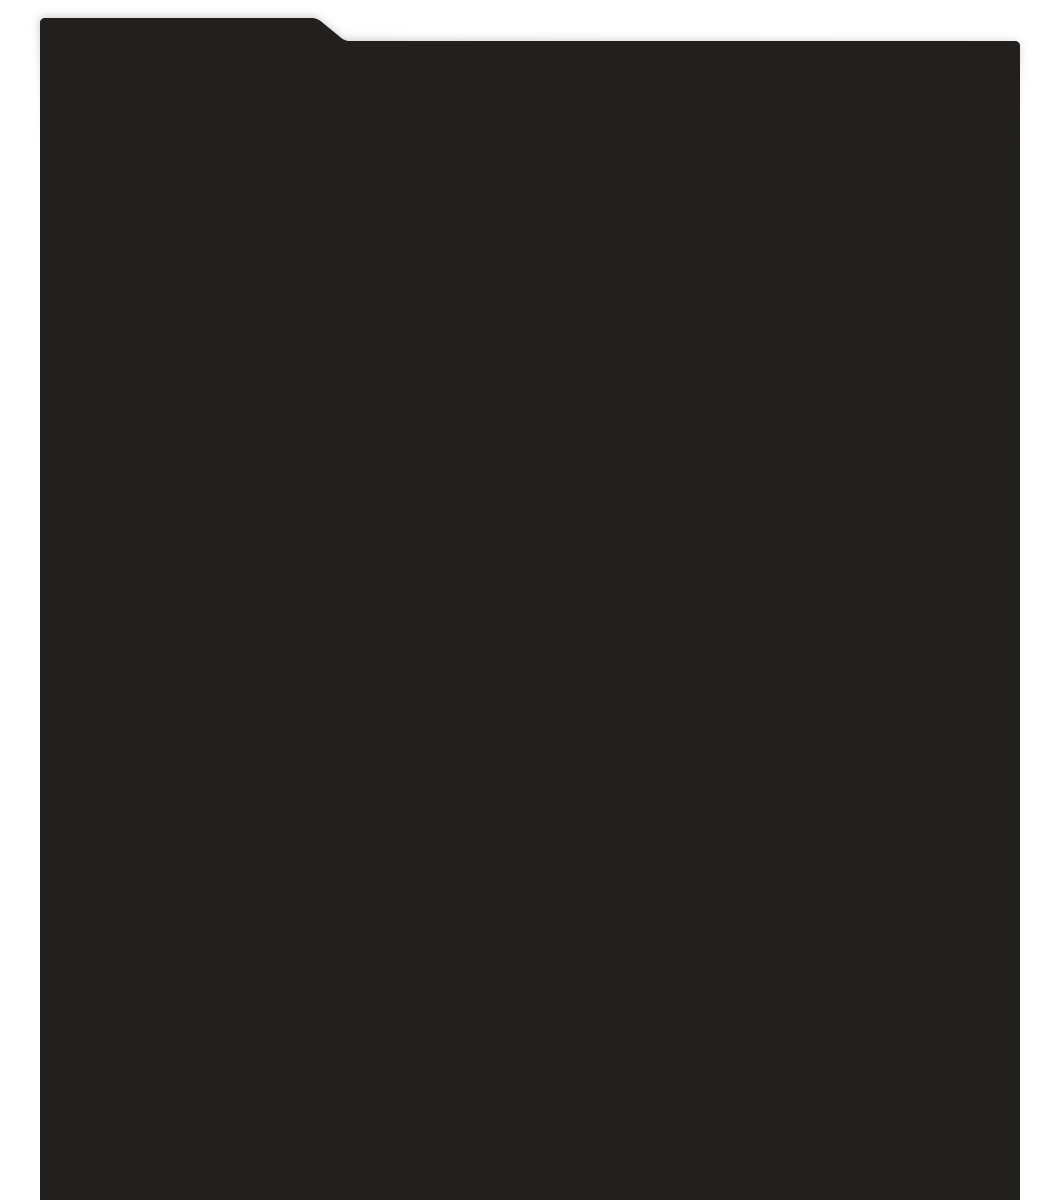
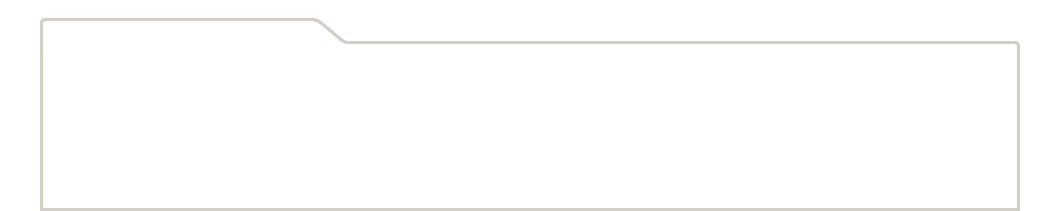
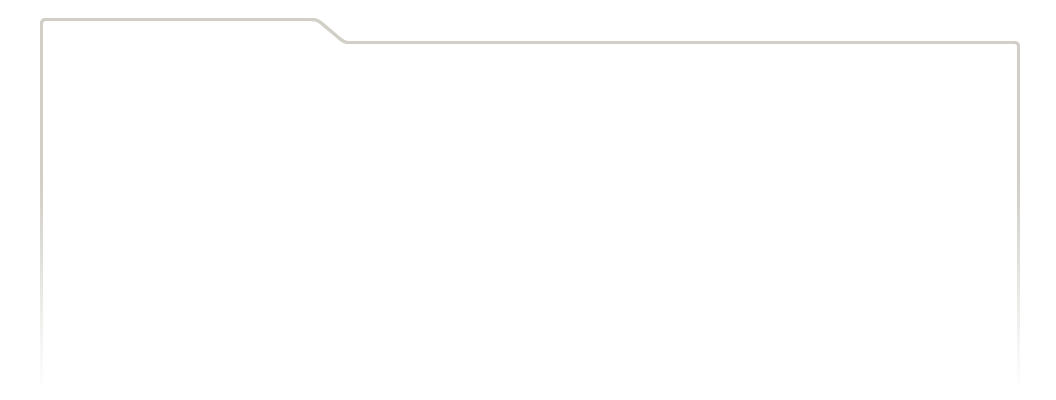
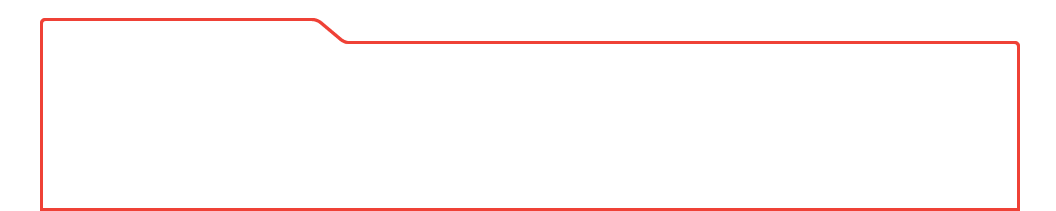
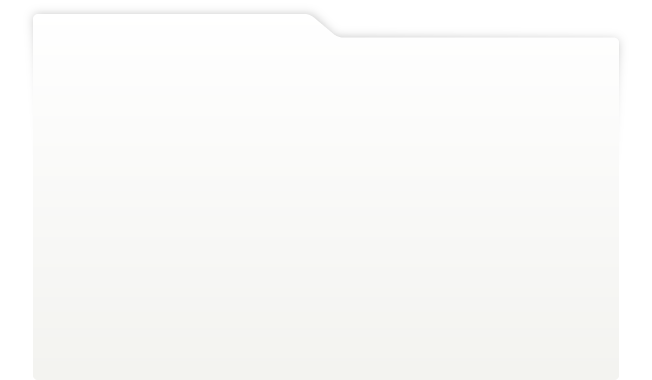
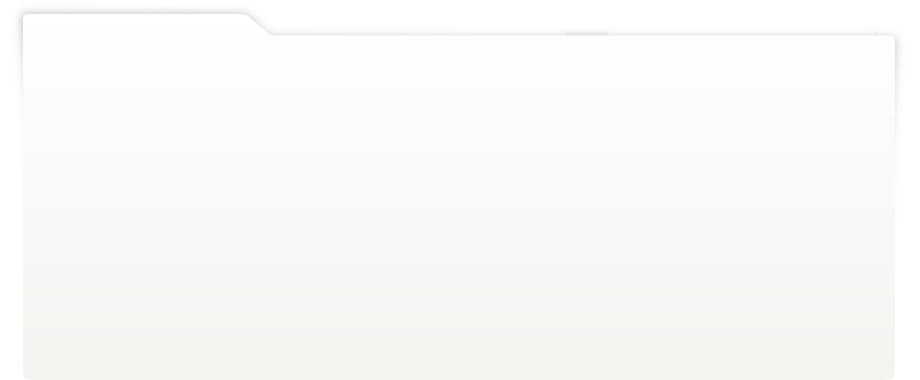
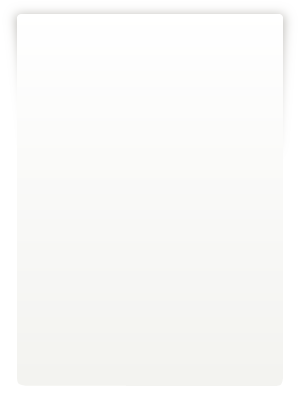
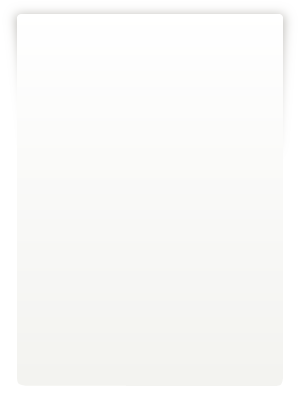
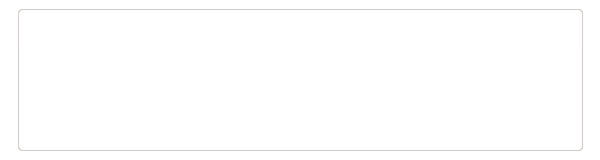
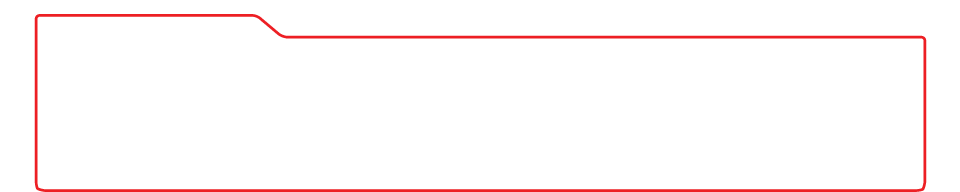
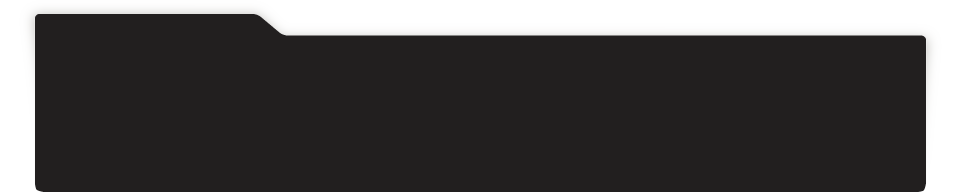
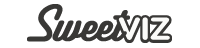
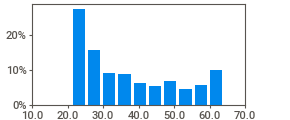
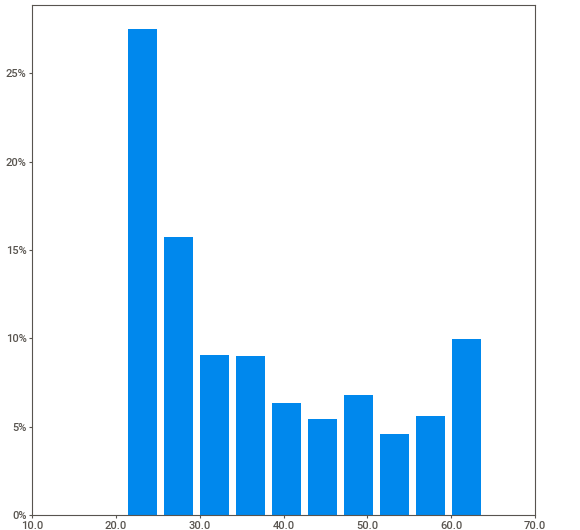
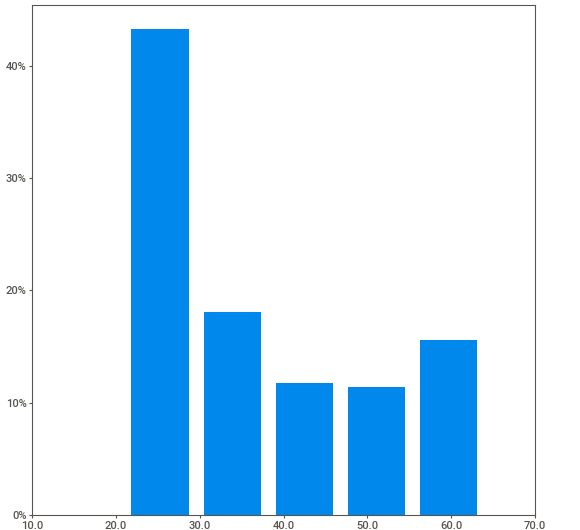
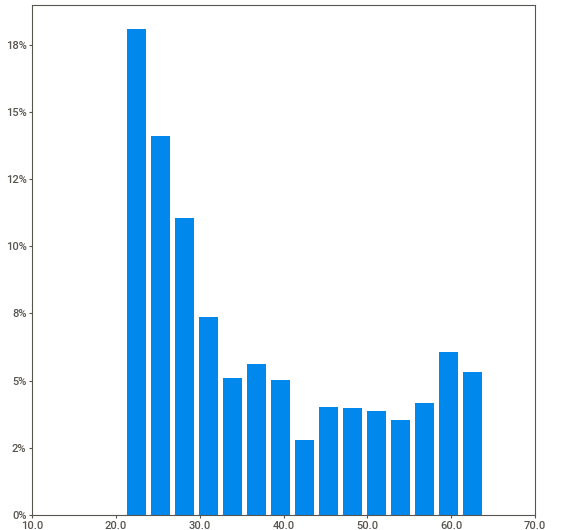
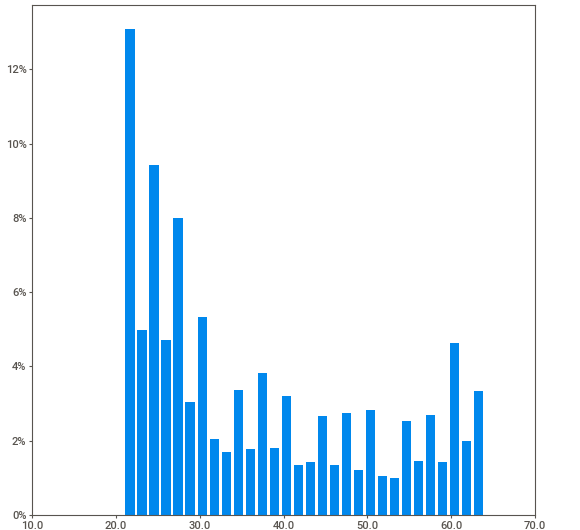
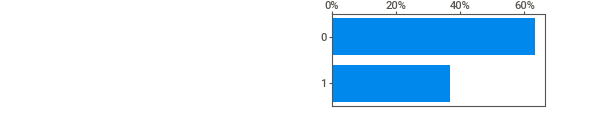
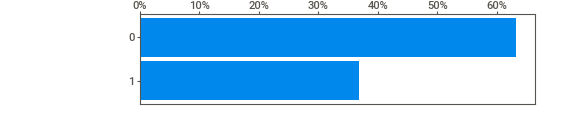
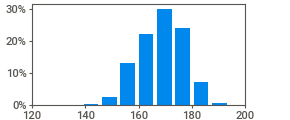
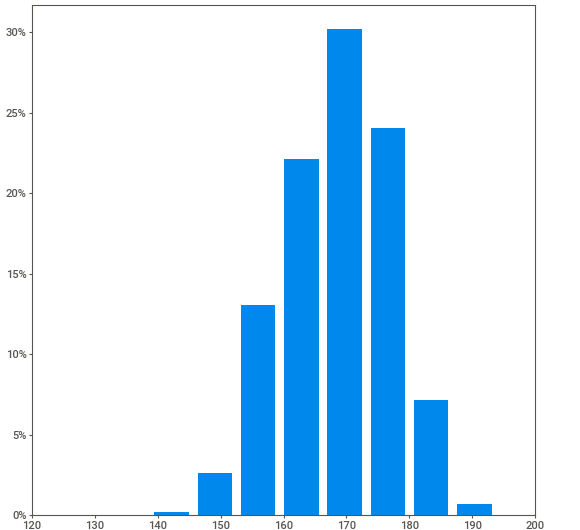
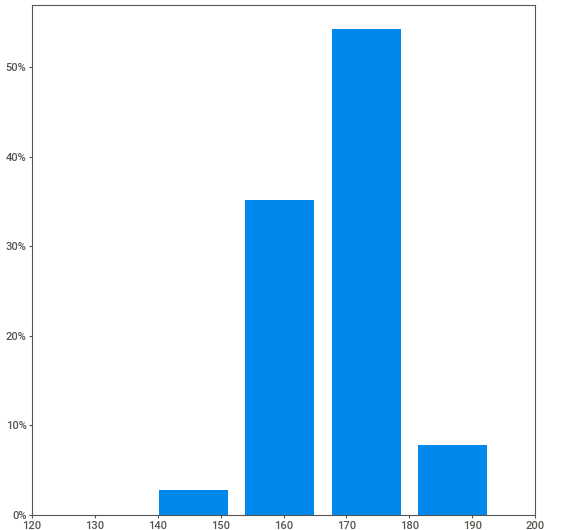
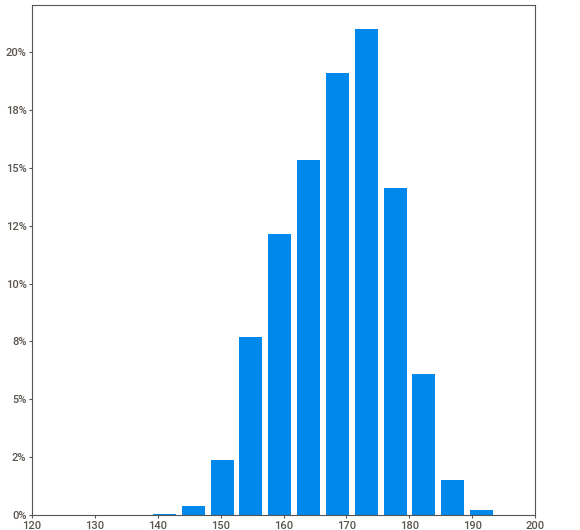
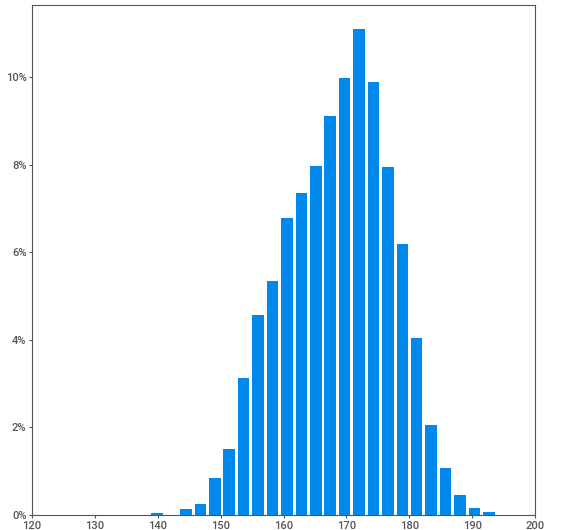
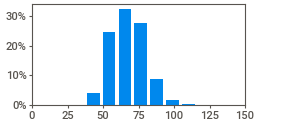
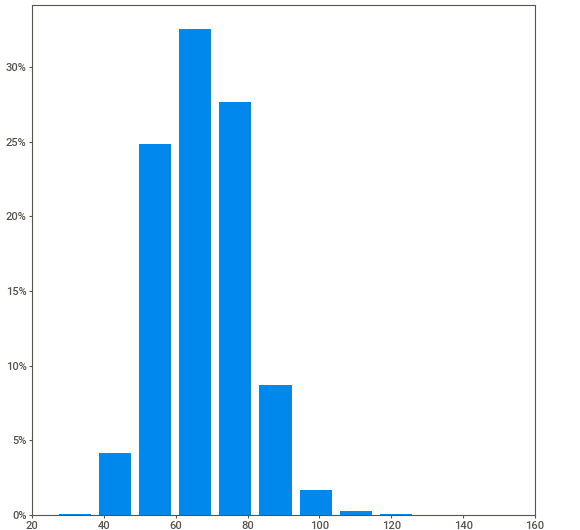
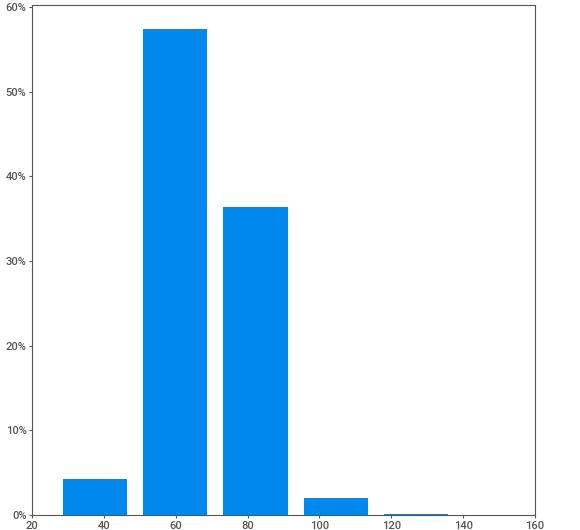
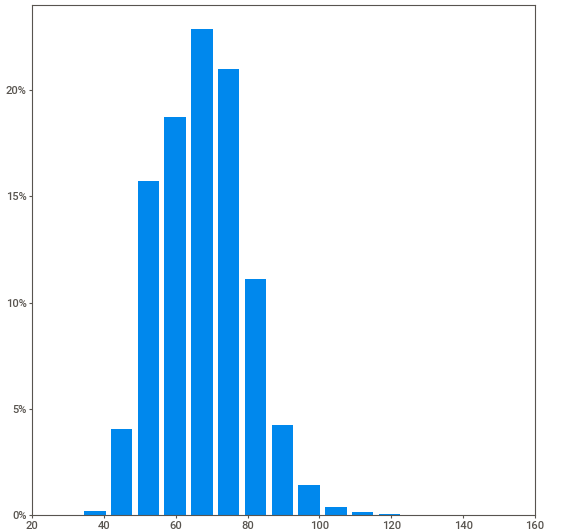
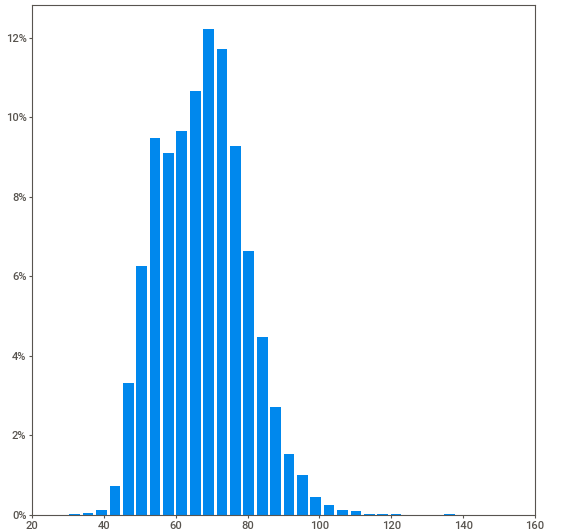
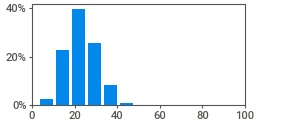
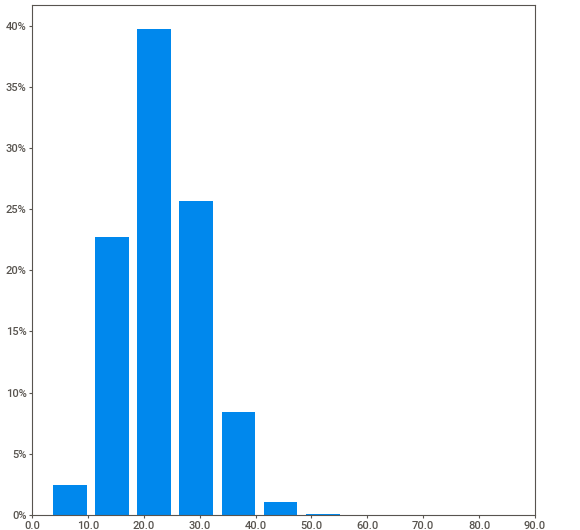
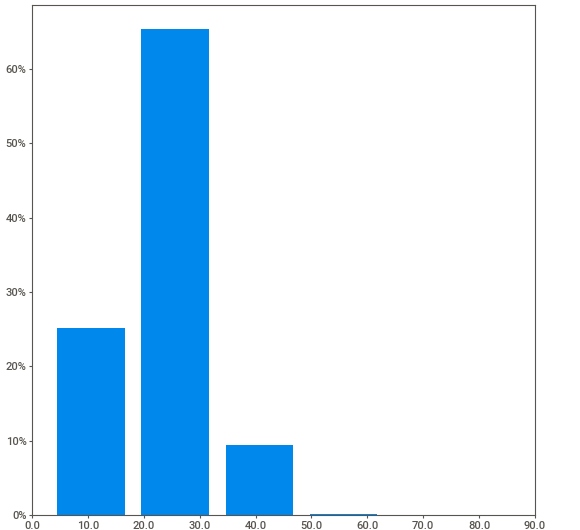
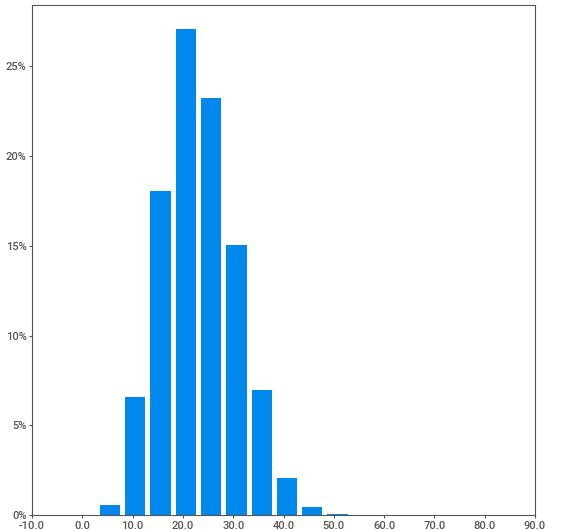
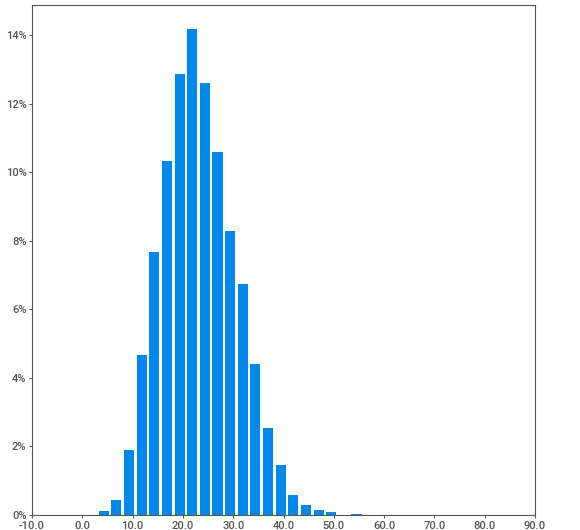
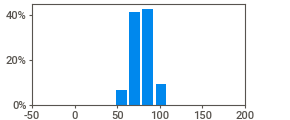
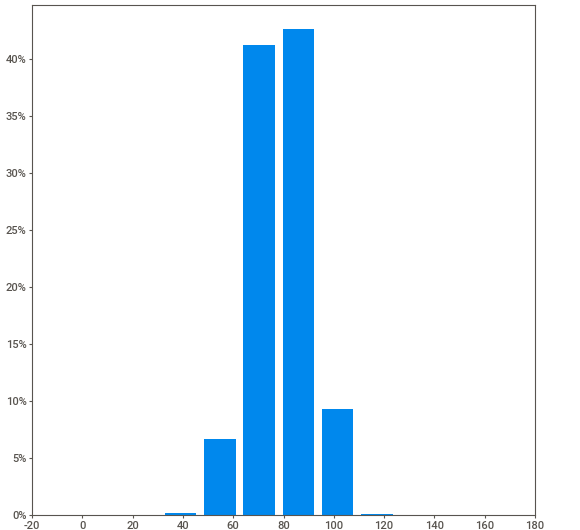
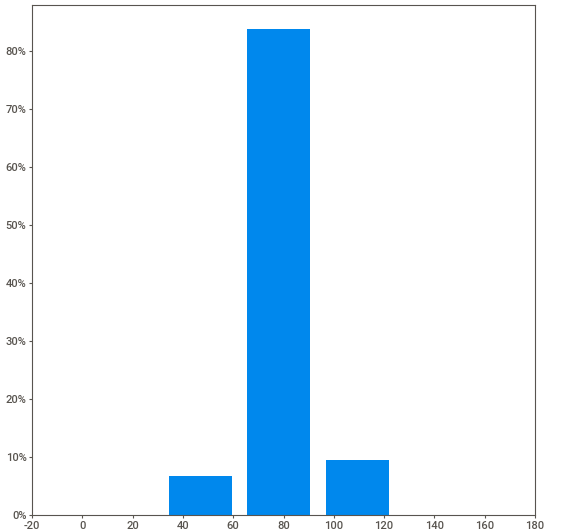
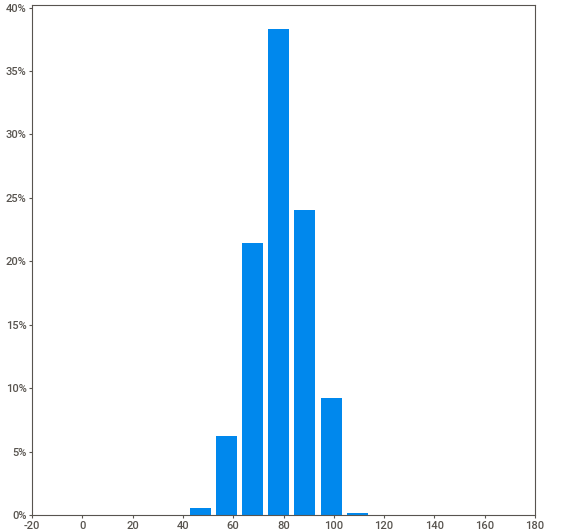
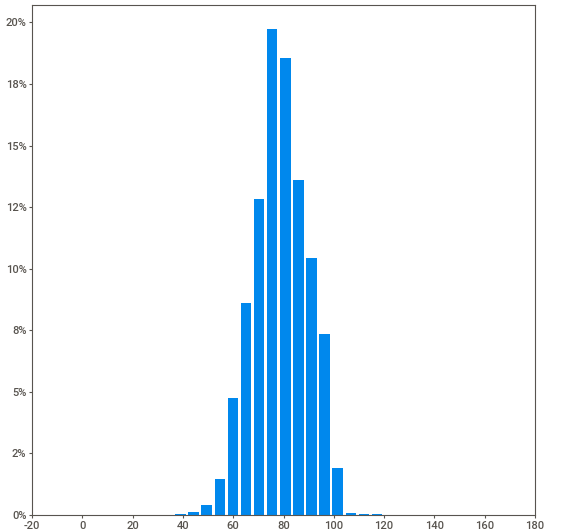
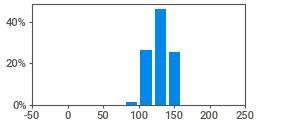
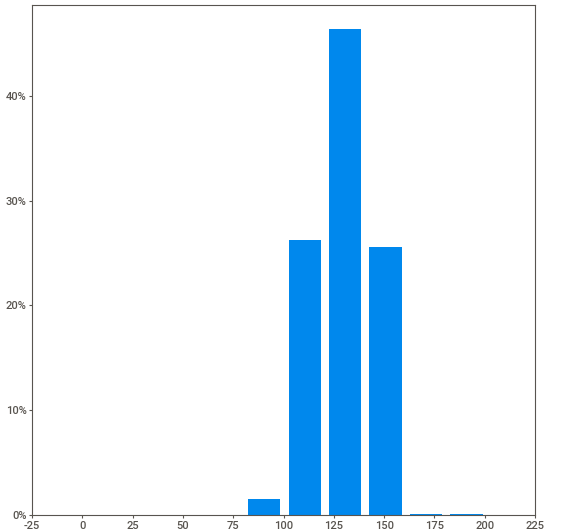
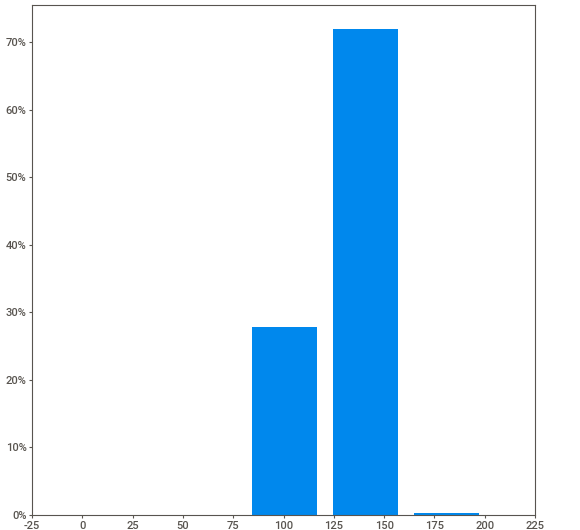
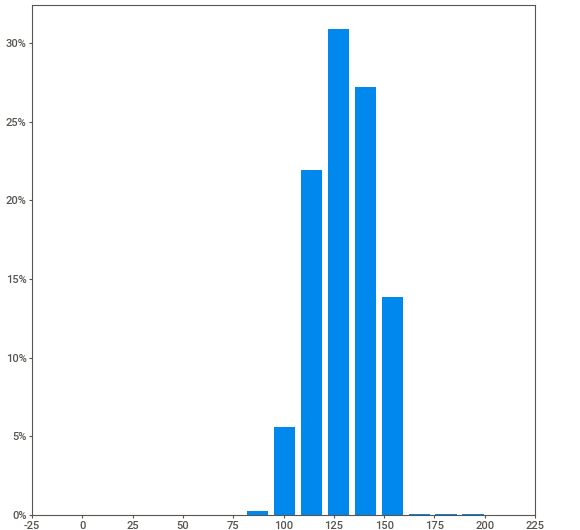
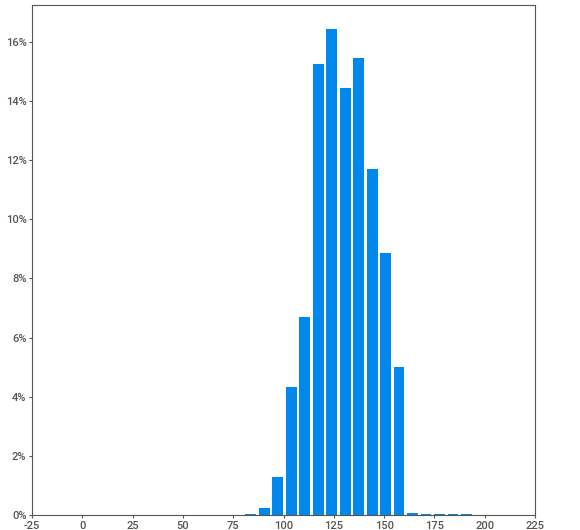
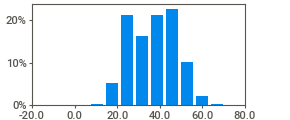
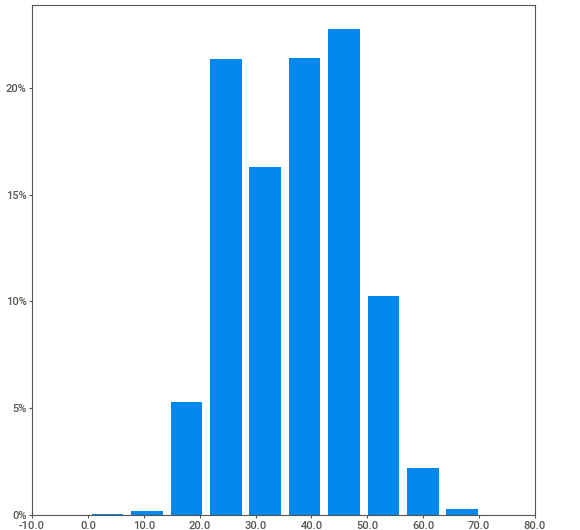
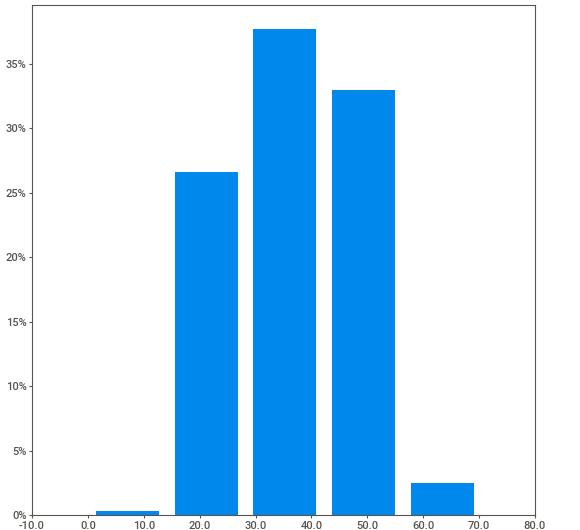
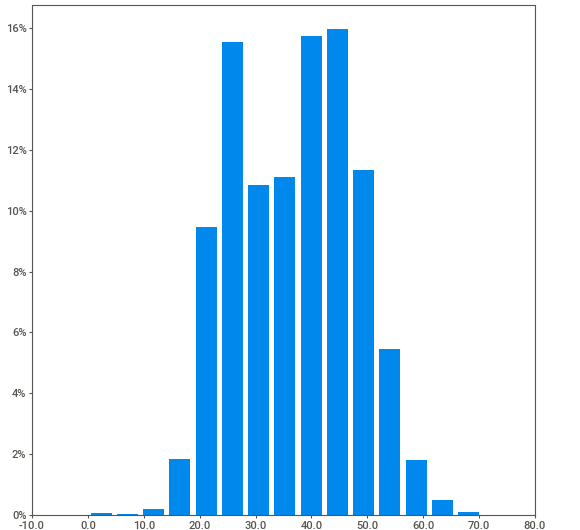
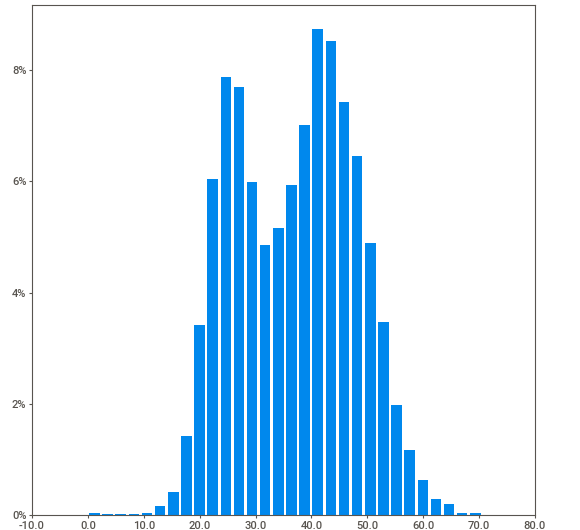
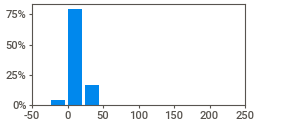
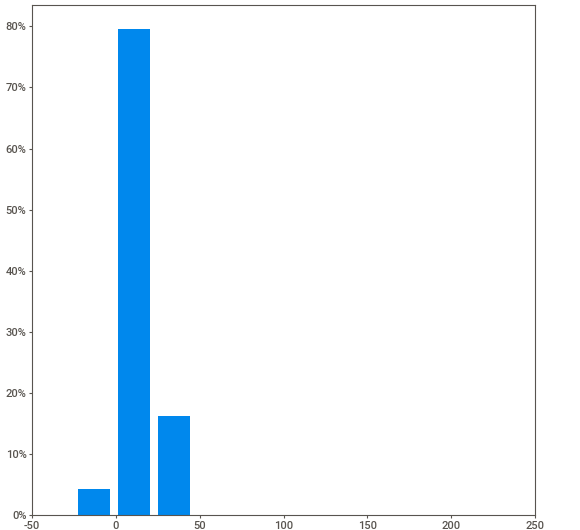
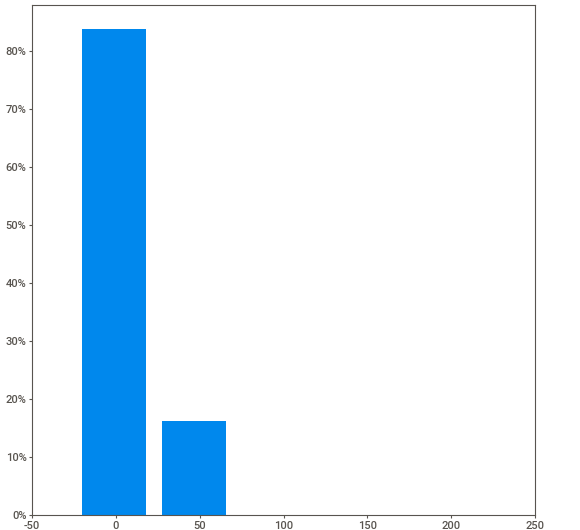
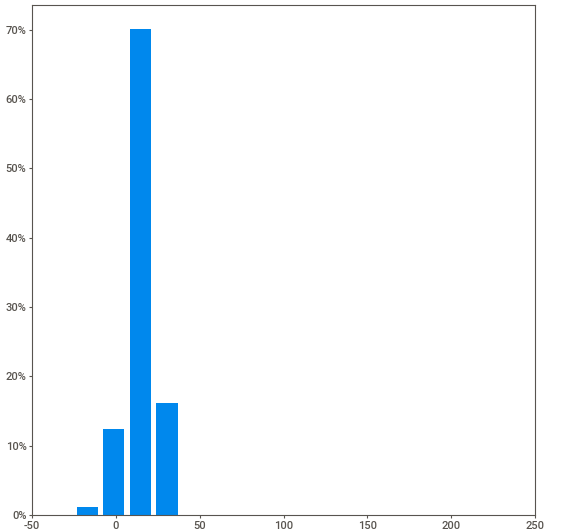
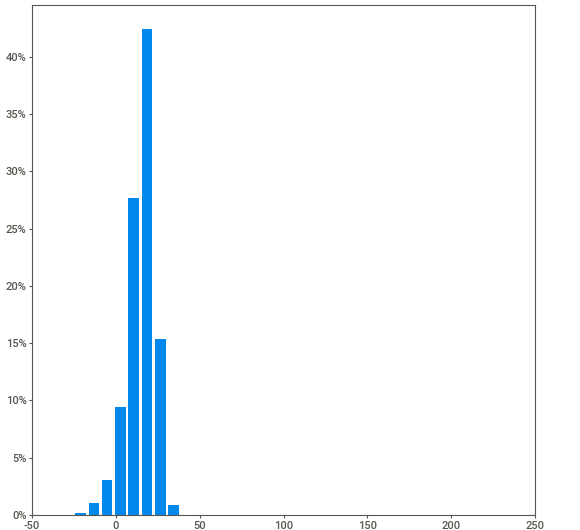
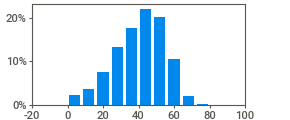
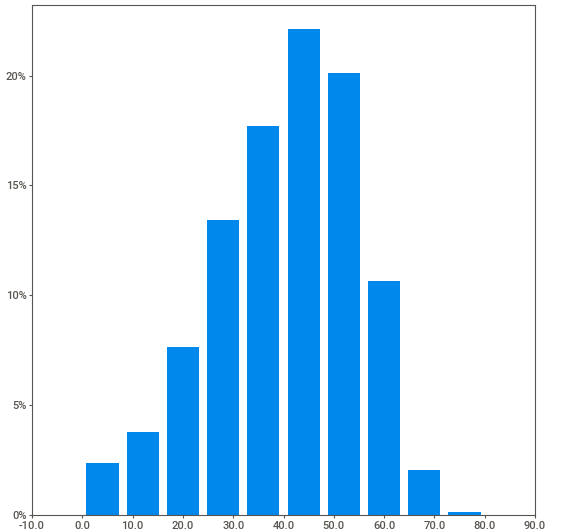
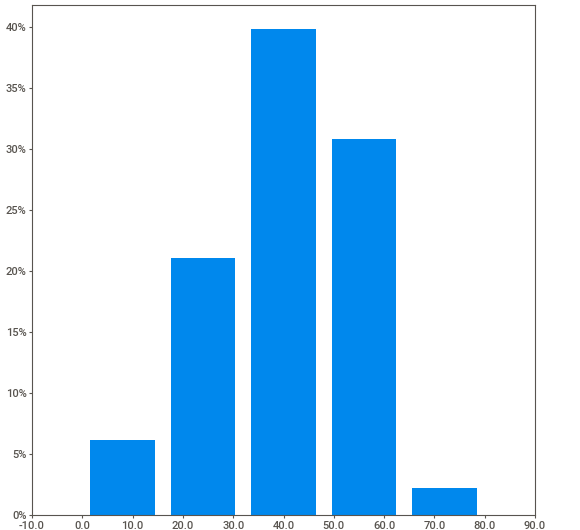
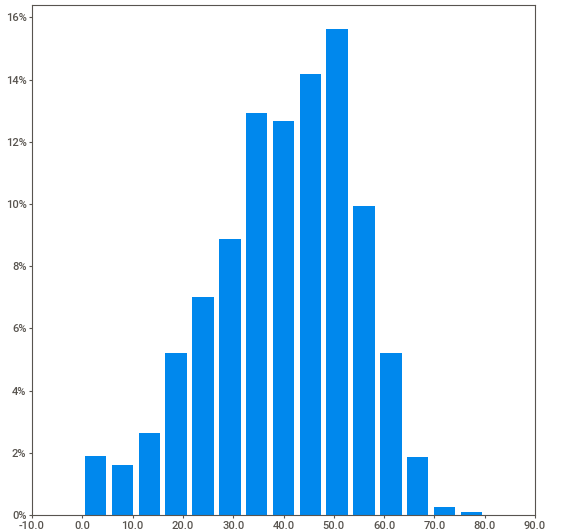
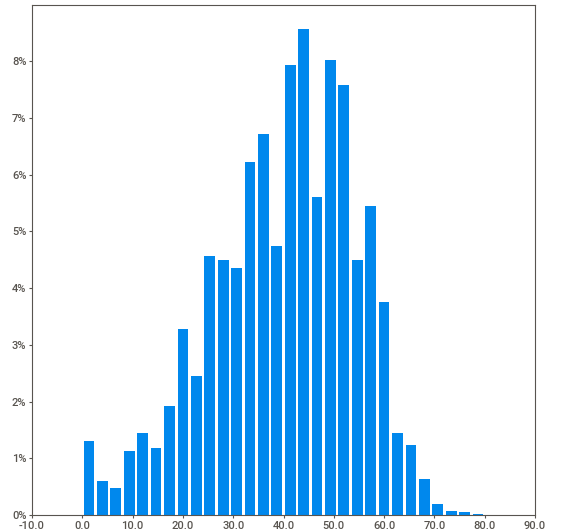
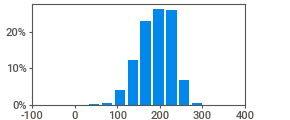
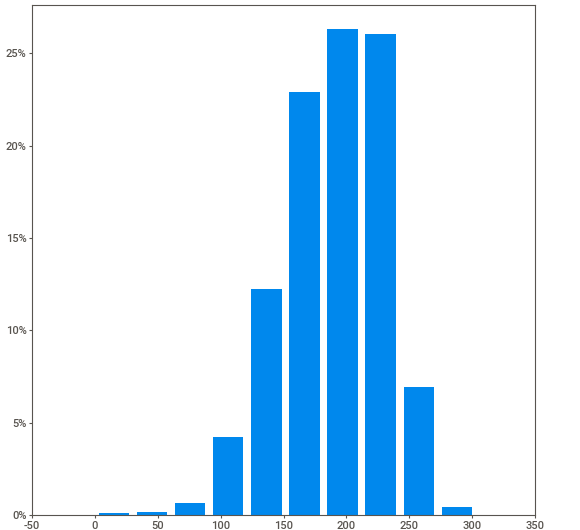
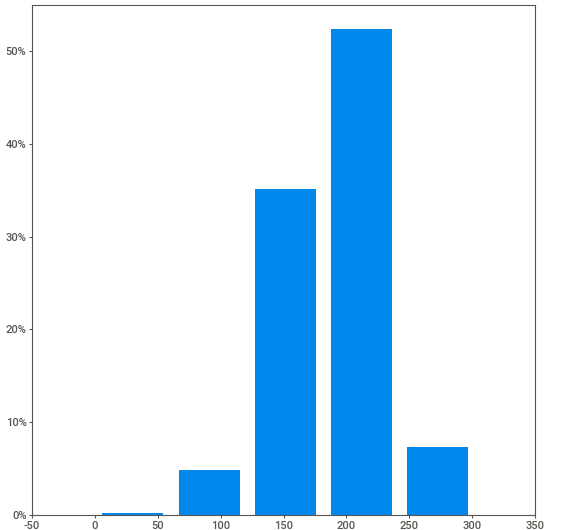
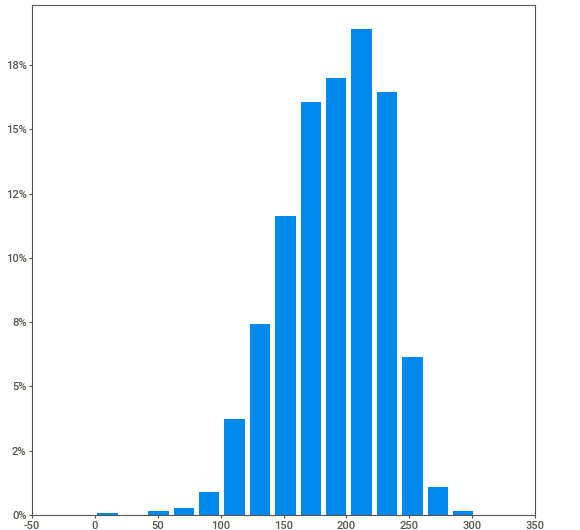
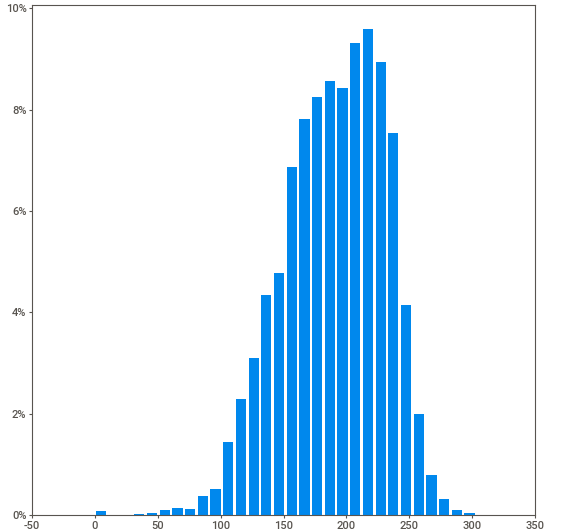
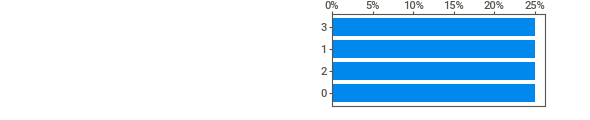
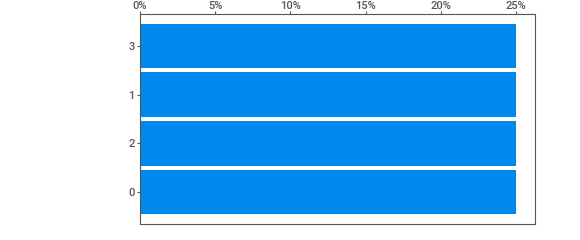
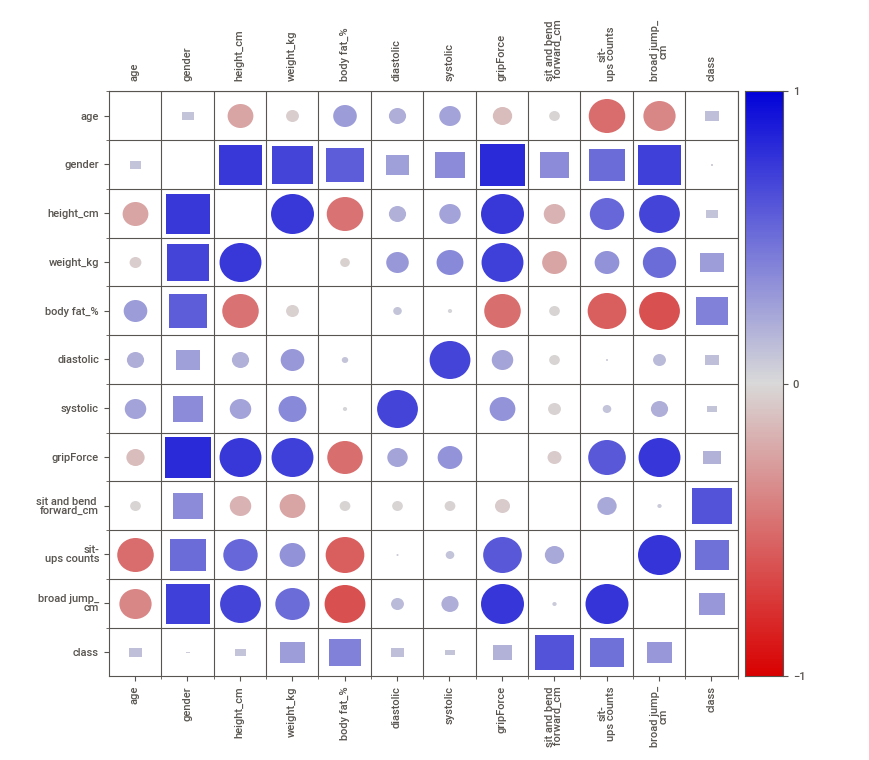
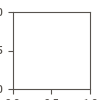

In [ ]:
report = sv.analyze(df)
report.show_notebook()

Судя по графикам, предоставленным библиотекой sweetviz, в датасете собрано одинаковое количество людей для каждого класса физического состояния. Мужчин здесь больше, чем женщин. В основном собраны молодые люди среднего телосложения (65 кг, 170 см).

In [ ]:
WholeData = df.to_numpy()[:, :-1]
WholeResultData = df.to_numpy()[:, -1]#Выбираем входные признаки и целевую переменную

TrainInputData = []
TrainOutputData = []
TestInputData = []
TestOutputData = []

for i in range(0, round(len(WholeData)*0.8)):
  TrainInputData.append(WholeData[i])
  TrainOutputData.append(WholeResultData[i])
  #Возьмём 80% данных для обучения

for i in range((round(len(WholeData)*0.2))+1, len(WholeData)):#+1, чтобы случайно не зацепить предыдущее значение при округлении
  TestInputData.append(WholeData[i])
  TestOutputData.append(WholeResultData[i])
  #Возьмём 20% данных для проверки

In [ ]:
from sklearn import linear_model, ensemble
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.preprocessing import RobustScaler

In [ ]:
skf = StratifiedKFold(n_splits=5)
acc = []
for i in enumerate(skf.split(WholeData, WholeResultData)):
  model = neighbors.KNeighborsClassifier(n_neighbors=1)
  model.fit(TrainInputData, TrainOutputData)
  acc.append(accuracy_score(TestOutputData, model.predict(TestInputData)))
print("Точность: ", np.mean(acc) * 100, " %")

Точность:  88.3001588636576  %


In [ ]:
scaler = RobustScaler()
model.fit(scaler.fit_transform(WholeData), WholeResultData)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
import gradio as gr

In [ ]:
inputs = [gr.Dataframe(row_count = (2, "dynamic"), col_count=(11,"dynamic"), label="Input Data", interactive=1)]

outputs = [gr.Dataframe(row_count = (2, "dynamic"), col_count=(1, "fixed"), label="Predictions", headers=["Physical Condition"])]

def infer(input_dataframe):
  scaled = scaler.transform(input_dataframe)
  return pd.DataFrame(model.predict(scaled))

gr.Interface(fn = infer, inputs = inputs, outputs = outputs, examples = [[WholeData[:2, :]]]).launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>